In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy
from matplotlib import pyplot as plt

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Grupo TAC/TA-FINAL/cifar-100-python

/content/drive/.shortcut-targets-by-id/1DvKtVWZtXjoE10GFyC28K1eLj25rZXwa/Grupo TAC/TA-FINAL/cifar-100-python


In [ ]:
train_data  = unpickle('train')

In [ ]:
print(train_data.keys())
for item in train_data:
    print(item, type(train_data[item]))

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
b'filenames' <class 'list'>
b'batch_label' <class 'bytes'>
b'fine_labels' <class 'list'>
b'coarse_labels' <class 'list'>
b'data' <class 'numpy.ndarray'>


In [ ]:
print("Fine Labels:", set(train_data[b'fine_labels']))
print("Coarse Labels:", set(train_data[b'coarse_labels']))

Fine Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Coarse Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [ ]:
X_train = train_data[b'data']
X_train.shape

(50000, 3072)

In [ ]:
meta_file = r'meta'
meta_data = unpickle(meta_file)

In [ ]:
print(type(meta_data))
print(meta_data.keys())

<class 'dict'>
dict_keys([b'fine_label_names', b'coarse_label_names'])


In [ ]:
print("Fine Label Names:", meta_data[b'fine_label_names'] )

Fine Label Names: [b'apple', b'aquarium_fish', b'baby', b'bear', b'beaver', b'bed', b'bee', b'beetle', b'bicycle', b'bottle', b'bowl', b'boy', b'bridge', b'bus', b'butterfly', b'camel', b'can', b'castle', b'caterpillar', b'cattle', b'chair', b'chimpanzee', b'clock', b'cloud', b'cockroach', b'couch', b'crab', b'crocodile', b'cup', b'dinosaur', b'dolphin', b'elephant', b'flatfish', b'forest', b'fox', b'girl', b'hamster', b'house', b'kangaroo', b'keyboard', b'lamp', b'lawn_mower', b'leopard', b'lion', b'lizard', b'lobster', b'man', b'maple_tree', b'motorcycle', b'mountain', b'mouse', b'mushroom', b'oak_tree', b'orange', b'orchid', b'otter', b'palm_tree', b'pear', b'pickup_truck', b'pine_tree', b'plain', b'plate', b'poppy', b'porcupine', b'possum', b'rabbit', b'raccoon', b'ray', b'road', b'rocket', b'rose', b'sea', b'seal', b'shark', b'shrew', b'skunk', b'skyscraper', b'snail', b'snake', b'spider', b'squirrel', b'streetcar', b'sunflower', b'sweet_pepper', b'table', b'tank', b'telephone', b

In [ ]:
print("Coarse Label Names:", meta_data[b'coarse_label_names'] )

Coarse Label Names: [b'aquatic_mammals', b'fish', b'flowers', b'food_containers', b'fruit_and_vegetables', b'household_electrical_devices', b'household_furniture', b'insects', b'large_carnivores', b'large_man-made_outdoor_things', b'large_natural_outdoor_scenes', b'large_omnivores_and_herbivores', b'medium_mammals', b'non-insect_invertebrates', b'people', b'reptiles', b'small_mammals', b'trees', b'vehicles_1', b'vehicles_2']


In [ ]:
X_train = train_data[b'data']
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)

In [ ]:
train_data_mammals = []
train_labels_mammals = []
c_labels = train_data[b'coarse_labels']
f_labels = train_data[b'fine_labels']
coarse_names = meta_data[b'coarse_label_names']
fine_names = meta_data[b'fine_label_names']

print(f_labels)


f_names = []
# coarse_names[c_labels[i-1]], fine_names[f_labels[i-1]]

for i in range(len(train_data[b'coarse_labels'])):
  if(train_data[b'coarse_labels'][i] == 16):
    image = train_data[b'data'][i]
    image = image.reshape(3,32,32).transpose(1,2,0)
    train_labels_mammals.append(f_labels[i])
    train_data_mammals.append(image)
    
train_data_mammals = np.array(train_data_mammals)
print(fine_names[train_labels_mammals[0]])

[19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39, 4, 97, 61, 93, 51, 69, 56, 84, 59, 64, 94, 4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67, 70, 64, 53, 64, 8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40, 4, 99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32, 82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72, 0, 44, 7, 12, 19, 11, 31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69, 39, 73, 2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37, 39, 8, 9, 62, 86, 39, 19, 54, 39, 28, 11, 89, 90, 90, 79, 66, 81, 21, 79, 40, 29, 22, 13, 25, 11, 38, 10, 96, 54, 65, 39, 40, 42, 48, 48, 51

Text(0.5, 1.0, "Fine Label Name:b'squirrel'")

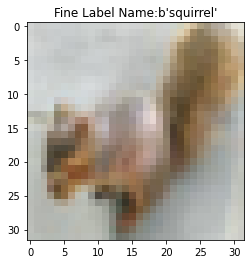

In [ ]:
image = train_data_mammals[8]
# reshape and transpose the image

f_label = fine_names[train_labels_mammals[8]]

# take coarse and fine label names of the image
# dispaly the image
plt.imshow(image)
plt.title("Fine Label Name:{}"
          .format(f_label))

In [ ]:
#Separar los mamiferos

In [ ]:
for i in range(len(meta_data[b'coarse_label_names'])):
  if(meta_data[b'coarse_label_names'][i] == b'small_mammals'):
    print(i)

16


In [ ]:
acc = 0
for i in range(len(train_data[b'coarse_labels'])):
  if(train_data[b'coarse_labels'][i] == 16):
    # print(i)
    acc += 1



In [ ]:
print(train_data[b'data'])


[[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 ...
 [248 240 236 ... 180 174 205]
 [156 151 151 ... 114 107 126]
 [ 31  30  31 ...  72  69  67]]


In [ ]:
print(train_data_mammals)

[[[[ 71  73  70]
   [ 46  48  45]
   [ 74  76  73]
   ...
   [ 62  51  34]
   [ 63  52  36]
   [ 62  53  35]]

  [[ 58  60  57]
   [ 41  43  40]
   [ 80  82  79]
   ...
   [ 78  65  46]
   [ 79  65  38]
   [ 77  64  35]]

  [[ 47  49  46]
   [ 39  41  38]
   [ 83  85  82]
   ...
   [ 88  75  59]
   [ 88  70  46]
   [ 89  71  45]]

  ...

  [[ 55  64  58]
   [ 51  54  40]
   [ 91  79  58]
   ...
   [ 82  88  78]
   [ 79  85  75]
   [ 92  98  89]]

  [[ 53  65  57]
   [ 80  81  66]
   [108  94  72]
   ...
   [ 83  89  78]
   [ 85  91  80]
   [ 69  75  66]]

  [[ 81  93  86]
   [ 83  83  68]
   [106  92  69]
   ...
   [ 95 101  89]
   [ 88  94  82]
   [ 84  90  80]]]


 [[[156 153 147]
   [151 151 143]
   [158 157 152]
   ...
   [145 143 130]
   [145 142 134]
   [146 144 137]]

  [[150 148 139]
   [150 150 139]
   [156 155 150]
   ...
   [142 141 124]
   [147 144 134]
   [148 148 142]]

  [[145 143 134]
   [155 154 147]
   [157 156 151]
   ...
   [143 142 125]
   [153 151 139]
   [152 150

In [ ]:

def showNineImages(train_data_mammals,train_labels_mammals):
  images = train_data_mammals
  # reshape and transpose the images
  fine_names = meta_data[b'fine_label_names']


  # dispaly random nine images
  # define row and column of figure
  rows, columns = 3, 3
  # take random image idex id
  imageId = np.random.randint(0, len(images), rows * columns)
  print(imageId)
  # take images for above random image ids
  images = images[imageId]
  # take coarse and fine labels for these images only
  # define figure
  fig=plt.figure(figsize=(8, 10))
  # visualize these random images
  for i in range(0, columns*rows):
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(images[i])
      plt.xticks([])
      plt.yticks([])
      plt.title("{}"
            .format(fine_names[train_labels_mammals[imageId[i]]]))
  plt.show()

In [ ]:
def split_list(a_list):
    np.random.shuffle(a_list)
    return a_list[:100], a_list[100:]

[413  35  42 401 134 312 250 173 141]


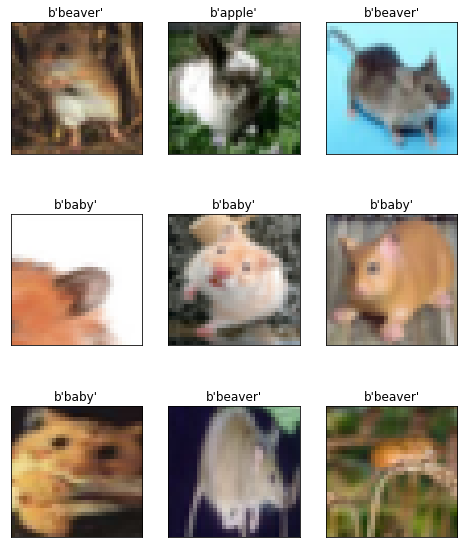

In [ ]:
dict = {}

for i in set(train_labels_mammals):
  dict[i] = fine_names[i]

rabbitArray = []
hamsterArray = []
shrewArray = []
squirrelArray = []
mouseArray = []

for i in range(len(train_data_mammals)):
  if train_labels_mammals[i] == 65:
    rabbitArray.append(i)
  if train_labels_mammals[i] == 36:
    hamsterArray.append(i)
  if train_labels_mammals[i] == 74:
    shrewArray.append(i)
  if train_labels_mammals[i] == 80:
    squirrelArray.append(i)
  if train_labels_mammals[i] == 50:
    mouseArray.append(i)

# imageIdRabbits = np.random.choice(len(rabbitArray), 100, replace=False)
# rabbitArray = [rabbitArray[i] for i in imageIdRabbits]
# imageIdHamster = np.random.choice(len(hamsterArray), 100, replace=False)
#  = [hamsterArray[i] for i in imageIdHamster]
# imageIdShrew = np.random.choice(len(shrewArray), 100, replace=False)
# shrewArray = [shrewArray[i] for i in imageIdShrew]
# imageIdSquirrel = np.random.choice(len(squirrelArray), 100, replace=False)
# squirrelArray = [squirrelArray[i] for i in imageIdSquirrel]
# imageIdMouse =np.random.choice(len(mouseArray), 100, replace=False)
# mouseArray = [mouseArray[i] for i in imageIdMouse]

rabbitArrayTest, rabbitArrayTrain =  split_list (rabbitArray)
hamsterArrayTest, hamsterArrayTrain =  split_list (hamsterArray)
shrewArrayTest, shrewArrayTrain =  split_list (shrewArray)
squirrelArrayTest, squirrelArrayTrain =  split_list (squirrelArray)
mouseArrayTest, mouseArrayTrain =  split_list (mouseArray)

data_set_test = rabbitArrayTest + hamsterArrayTest + shrewArrayTest + squirrelArrayTest + mouseArrayTest
data_set_train = rabbitArrayTrain + hamsterArrayTrain + shrewArrayTrain + squirrelArrayTrain + mouseArrayTrain

x_train = []
y_train = []
x_val = []
y_val = []
label_one_hot_encoder = {
    65:0,
    80:1,
    36:2,
    74:3,
    50:4
}
for i in range(len(train_data_mammals)):
  if i in data_set_test:
    x_val.append(train_data_mammals[i])
    y_val.append(label_one_hot_encoder[train_labels_mammals[i]])
  elif i in data_set_train:
    x_train.append(train_data_mammals[i])
    y_train.append(label_one_hot_encoder[train_labels_mammals[i]])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

showNineImages(x_val,y_val)

In [ ]:
x_train.shape, y_train.shape

((2000, 32, 32, 3), (2000,))

In [ ]:
# x_train = x_train.reshape((-1, 32, 32, 1))
# x_val = x_val.reshape((-1, 32, 32, 1))

In [ ]:
x_train.shape,x_val.shape

((2000, 32, 32, 3), (500, 32, 32, 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv3D, MaxPool2D, Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,ReLU,Flatten,Dropout,BatchNormalization,SeparableConv2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD

K.clear_session()

input_layer = Input(shape=(32, 32, 3))

general_layer = tf.keras.applications.ResNet50(weights='imagenet',include_top=False)(input_layer)
general_layer.trainable = False

general_layer = MaxPool2D(pool_size=1)(general_layer)  
general_layer = Dropout(0.3)(general_layer)
general_layer = Flatten()(general_layer)

label_layer = Dense(64,activation='relu')(general_layer)
label_layer = Dense(32,activation='relu')(general_layer)
label_layer = Dense(16,activation='relu')(general_layer)

output_layer = Dense(10, activation="softmax")(label_layer)

model = Model(inputs=input_layer, outputs=output_layer)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
initial_learning_rate = 0.0001
decay_steps=100,
decay_rate=0.96,

lr = 0.001
momentum = 0.9

lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=lr, momentum=momentum), loss="sparse_categorical_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 2048)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                32784     
                                                             

In [ ]:
def show_results(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_acc']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['acc'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  for ax in axes: ax.legend()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 40

checkpoint = ModelCheckpoint("model-epoch:{epoch:02d}-loss:{loss:.3f}-val_acc:{val_acc:.3f}-weights", monitor="val_acc", mode="max") #No modificar esta línea

early_stopping = EarlyStopping(monitor="val_acc", patience=10, mode="max")

callbacks = [checkpoint, early_stopping] #No modificar esta línea

In [ ]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_val, y_val))

In [ ]:
bs = 100
dataset_train = dataset_train.shuffle(buffer_size=100).batch(bs).prefetch(50)

dataset_test = dataset_test.shuffle(buffer_size=100).batch(bs).prefetch(50)

In [ ]:
# log = model.fit(dataset_train, epochs=epochs, callbacks=callbacks, validation_data=dataset_test)

In [ ]:
history = model.fit(dataset_train, batch_size=bs, epochs=epochs, validation_data=dataset_test, callbacks=callbacks)

Epoch 1/40
20/20 [==============================] - 41s 1s/step - loss: 2.5393 - acc: 0.1640 - val_loss: 2.6870 - val_acc: 0.2400
Epoch 2/40
20/20 [==============================] - 22s 1s/step - loss: 1.8978 - acc: 0.3080 - val_loss: 2.0711 - val_acc: 0.2920
Epoch 3/40
20/20 [==============================] - 25s 1s/step - loss: 1.5125 - acc: 0.4815 - val_loss: 2.2183 - val_acc: 0.3140
Epoch 4/40
20/20 [==============================] - 23s 1s/step - loss: 1.1829 - acc: 0.5915 - val_loss: 1.9626 - val_acc: 0.3340
Epoch 5/40
20/20 [==============================] - 23s 1s/step - loss: 0.8523 - acc: 0.7165 - val_loss: 1.7889 - val_acc: 0.3680
Epoch 6/40
20/20 [==============================] - 24s 1s/step - loss: 0.6063 - acc: 0.7980 - val_loss: 1.6917 - val_acc: 0.3880
Epoch 7/40
20/20 [==============================] - 23s 1s/step - loss: 0.4373 - acc: 0.8560 - val_loss: 1.6194 - val_acc: 0.4320
Epoch 8/40
20/20 [==============================] - 23s 1s/step - loss: 0.3163 - acc: 0.90

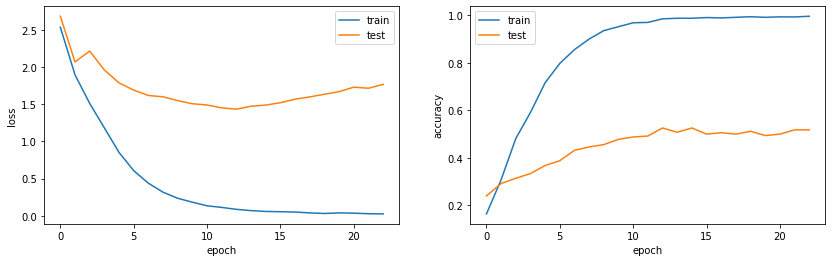

In [ ]:
show_results(history)

In [ ]:
label_train_predictions=model.predict(x_train).argmax(axis=1)
label_test_predictions=model.predict(x_val).argmax(axis=1)

In [ ]:
label_train_predictions.shape,label_test_predictions.shape

((2000,), (500,))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, label_train_predictions))
print("----------------------------------------------------------")
print(classification_report(y_val, label_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400
           4       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       100
           1       0.47      0.51      0.49       100
           2       0.61      0.68      0.64       100
           3       0.54      0.59      0.56       100
           4       0.43      0.38      0.40       100

    accuracy                           0.52       500
   macro avg       0.51      0.52      0.51       500
weighted avg      

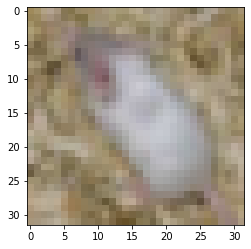

In [ ]:
image_number=40

plt.imshow(x_val[image_number])

In [ ]:
n = np.array(x_val[image_number])
labels = '''rabbit squirrel hamster shrew mouse'''.split()
predicted_label = labels[model.predict(n[None,:]).argmax()]

original_label = labels[y_val[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

Original label is mouse and predicted label is mouse


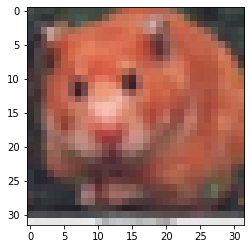

In [ ]:
image_number=80

plt.imshow(x_val[image_number])

In [ ]:
n = np.array(x_val[image_number])
labels = '''rabbit squirrel hamster shrew mouse'''.split()
predicted_label = labels[model.predict(n[None,:]).argmax()]

original_label = labels[y_val[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

Original label is hamster and predicted label is hamster
